### Sequential API, Functional API

#### Sequential API
- Sequential API는 간단한 모델을 구현하기에 적합하고 단순하게 층을 쌓는 방식으로 쉽고 사용하기가 간단하다.
- 단일 입력 및 출력만 있으므로 레이어를 공유하거나 여러 입력 또는 출력을 가질 수 있는 모델을 생성할 수 없다.

#### Funtional API
- Functional API는 Sequential API로는 구현하기 어려운 복잡한 모델들을 구현할 수 있다.
- 여러 개의 입력 및 출력을 가진 모델을 구현하거나 층 간의 연결 및 연산을 수행하는 모델 구현 시 사용한다.

#### 성능 평가

<img src='./images/validation.png' width='600px'>

In [1]:
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(train_images, train_targets), (test_images, test_targets) = fashion_mnist.load_data()

print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
import numpy as np

def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)

    return images, targets

train_images, train_targets = get_preprocessed_data(train_images, train_targets)
test_images, test_targets = get_preprocessed_data(test_images, test_targets)

print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

INPUT_SIZE = 28

# 전부 Dense Layer라고 부른다.
# 학습할 데이터가 많으면 neuron의 개수를 더 많이 지정(예, 64, 128, 256 등)하거나 
# 은닉층 수를 더 늘리면 된다.
# 학습할 데이터가 적으면 neuron의 개수 또는 은닉층 수를 줄이는 것이 좋다.
model = Sequential([
    # 전체 28 * 28 (784)개의 feature로 flatten 진행
    # 첫 번째 Input Layer
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    
    # 두 번째 Hidden Layer
    Dense(64, activation='relu'),
    
    # 세 번째 Hidden Layer
    Dense(128, activation='relu'),
    
    # 마지막 Output Layer
    Dense(10, activation='softmax')
])

# 파라미터 수 = (입력 뉴런 수 * 출력 뉴런 수) + 출력 뉴런 수
# 이 파라미터 수에는 편향(bias) 파라미터도 포함되어야 하고
# 편향은 각 출력 뉴런에 더해지는 추가적인 파라미터 수이다.
model.summary()

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,850 (233.79 KB)

 Trainable params: 59,850 (233.79 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [6]:
from tensorflow.keras.utils import to_categorical

train_oh_targets = to_categorical(train_targets)
test_oh_targets = to_categorical(test_targets)

print(train_oh_targets.shape, test_oh_targets.shape)

(60000, 10) (10000, 10)


In [9]:
history = model.fit(x=train_images, y=train_oh_targets, batch_size=64, epochs=20)

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 688us/step - accuracy: 0.7615 - loss: 0.6983
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step - accuracy: 0.8588 - loss: 0.3926
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 603us/step - accuracy: 0.8714 - loss: 0.3518
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 585us/step - accuracy: 0.8819 - loss: 0.3177
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 576us/step - accuracy: 0.8886 - loss: 0.3039
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 571us/step - accuracy: 0.8913 - loss: 0.2893
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 578us/step - accuracy: 0.8965 - loss: 0.2795
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 570us/step - accuracy: 0.9020 - loss: 0.2653
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 578us/step - accuracy: 0.9054 - loss: 0.2556
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 575us/step - accuracy: 0.9068 - loss: 0.2466
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 577us/step - accuracy: 0.9104 - loss: 0.2373
Epoch 12/20
938/938 ━━━━━━━━━━

In [12]:
print(history.history['loss'])
print('=' * 80)
print(history.history['accuracy'])

[0.5211946964263916, 0.37986788153648376, 0.34749430418014526, 0.3229270279407501, 0.3028789460659027, 0.28869950771331787, 0.28033095598220825, 0.2646019756793976, 0.25803494453430176, 0.2489241063594818, 0.24046708643436432, 0.2335386872291565, 0.22669333219528198, 0.22045157849788666, 0.21524831652641296, 0.20579460263252258, 0.20280563831329346, 0.19601787626743317, 0.19280937314033508, 0.18599040806293488]
[0.8179166913032532, 0.8626166582107544, 0.8721166849136353, 0.8805000185966492, 0.8888499736785889, 0.8923500180244446, 0.8945500254631042, 0.9018499851226807, 0.9042500257492065, 0.9064333438873291, 0.9098833203315735, 0.9124666452407837, 0.914983332157135, 0.9163500070571899, 0.9186333417892456, 0.9223499894142151, 0.9236000180244446, 0.9261999726295471, 0.9273666739463806, 0.9299833178520203]


In [17]:
np.expand_dims(test_images[0], axis=0).shape

(1, 28, 28)

In [13]:
pred_prob = model.predict(test_images)
print(pred_prob)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step
[[2.2430616e-07 6.6398998e-06 3.6084814e-06 ... 1.5920214e-02
  1.4123241e-08 9.8399252e-01]
 [5.4513890e-04 3.5777323e-14 9.9878556e-01 ... 1.8138173e-12
  1.0648162e-13 3.0144626e-12]
 [1.9795480e-12 1.0000000e+00 1.2975436e-12 ... 2.6024137e-24
  2.8405709e-14 1.1416460e-19]
 ...
 [1.1709940e-04 2.6654721e-09 1.1617433e-05 ... 3.8078761e-07
  9.9972624e-01 4.9269000e-12]
 [5.4377969e-09 1.0000000e+00 3.8491685e-10 ... 7.1552364e-18
  6.6827021e-12 3.6354934e-15]
 [9.0627706e-05 6.8966072e-10 7.3791075e-06 ... 1.2631307e-04
  3.4664776e-05 1.3307135e-08]]


In [28]:
pred_prob = model.predict(np.expand_dims(test_images[10], axis=0))
print(pred_prob)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[[4.7997844e-05 4.9193822e-08 5.7411239e-02 7.0059755e-08 9.3923181e-01
  1.3368894e-08 3.3084422e-03 1.9246332e-11 3.4784898e-07 2.7322162e-08]]


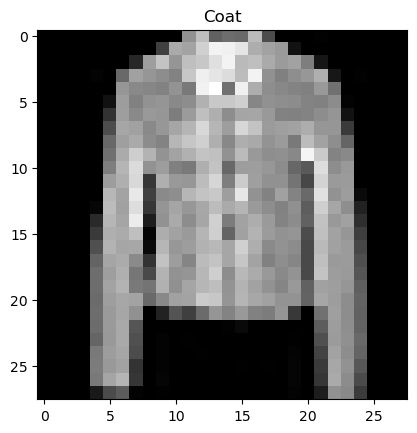

In [29]:
import matplotlib.pyplot as plt

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# print(class_names[pred_prob.flatten().argsort()[::-1][0]])

plt.imshow(test_images[10], cmap='gray')
plt.title(class_names[pred_prob.flatten().argsort()[::-1][0]])
plt.show()

In [30]:
model.evaluate(test_images, test_oh_targets, batch_size=64)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - acc: 0.8794 - loss: 0.3820


[0.3942955732345581, 0.8809999823570251]

### Validation

In [31]:
(train_images, train_targets), (test_images, test_targets) = fashion_mnist.load_data()

print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [32]:
import numpy as np

def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)

    return images, targets

train_images, train_targets = get_preprocessed_data(train_images, train_targets)
test_images, test_targets = get_preprocessed_data(test_images, test_targets)

print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [33]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

train_images, validation_images, train_targets, validation_targets = \
train_test_split(train_images, train_targets, stratify=train_targets, test_size=0.2, random_state=124)

train_oh_targets = to_categorical(train_targets)
validation_oh_targets = to_categorical(validation_targets)

print(train_images.shape, train_oh_targets.shape)
print(validation_images.shape, validation_oh_targets.shape)

(48000, 28, 28) (48000, 10)
(12000, 28, 28) (12000, 10)


In [34]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

INPUT_SIZE = 28

model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(64, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

model.compile(optimizer = Adam(0.001), loss = CategoricalCrossentropy(), metrics=['acc'] )

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
history = model.fit(x=train_images, y=train_oh_targets, validation_data = (validation_images, validation_oh_targets),
                   batch_size=32, epochs=20, verbose=2)

Epoch 1/20
1500/1500 - 2s - 1ms/step - acc: 0.8139 - loss: 0.5277 - val_acc: 0.8564 - val_loss: 0.4026
Epoch 2/20
1500/1500 - 1s - 599us/step - acc: 0.8583 - loss: 0.3879 - val_acc: 0.8529 - val_loss: 0.3990
Epoch 3/20
1500/1500 - 1s - 600us/step - acc: 0.8716 - loss: 0.3494 - val_acc: 0.8723 - val_loss: 0.3502
Epoch 4/20
1500/1500 - 1s - 614us/step - acc: 0.8800 - loss: 0.3264 - val_acc: 0.8678 - val_loss: 0.3689
Epoch 5/20
1500/1500 - 1s - 635us/step - acc: 0.8857 - loss: 0.3090 - val_acc: 0.8779 - val_loss: 0.3309
Epoch 6/20
1500/1500 - 1s - 632us/step - acc: 0.8908 - loss: 0.2945 - val_acc: 0.8842 - val_loss: 0.3243
Epoch 7/20
1500/1500 - 1s - 626us/step - acc: 0.8947 - loss: 0.2820 - val_acc: 0.8830 - val_loss: 0.3234
Epoch 8/20
1500/1500 - 1s - 640us/step - acc: 0.8981 - loss: 0.2703 - val_acc: 0.8886 - val_loss: 0.3132
Epoch 9/20
1500/1500 - 1s - 616us/step - acc: 0.9016 - loss: 0.2583 - val_acc: 0.8805 - val_loss: 0.3332
Epoch 10/20
1500/1500 - 1s - 663us/step - acc: 0.9047 - l

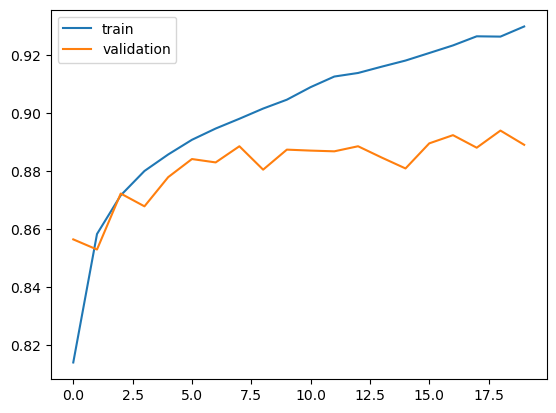

In [36]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[1.25236065e-05 7.49277029e-12 9.86306429e-01 7.07438019e-08
  7.66338035e-03 1.65789910e-10 6.01757783e-03 3.31533434e-12
  8.15203238e-10 3.41772606e-15]]


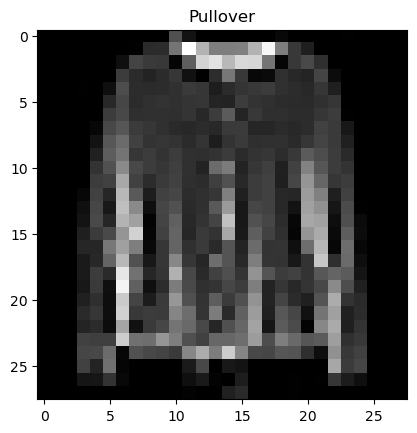

In [37]:
import matplotlib.pyplot as plt

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

pred_prob = model.predict(np.expand_dims(test_images[25], axis=0))
print(pred_prob)

plt.imshow(test_images[25], cmap='gray')
plt.title(class_names[pred_prob.flatten().argsort()[::-1][0]])
plt.show()

### Functinal API


In [38]:
class Test:
    def __call__(self, data):
        return data + 10

print(Test()(20))

30


In [39]:
from tensorflow.keras.layers import Layer, Input, Dense, Flatten
from tensorflow.keras.models import Model

INPUT_SIZE = 28

def create_model():
    input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE))
    x = Flatten()(input_tensor)
    x = Dense(64, activation = 'relu')(x)
    x = Dense(128, activation = 'relu')(x)
    output = Dense(10, activation = 'softmax')(x)

    model = Model(inputs = input_tensor, outputs=output)
    return model

In [41]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

def get_preprocessed_data(images, targets):
    images = np.array(images/ 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)

    return images, targets

def get_preprocessed_ohe(images, targets):
    images, targets = get_preprocessed_data(images, targets)
    oh_targets = to_categorical(targets)

    return images, oh_targets

def get_train_valid_test(train_images, train_targets, test_images, test_targets, validation_size=0.2, random_state=124):
    train_images, train_oh_targets = get_preprocessed_ohe(train_images, train_targets)
    test_images, test_oh_targets = get_preprocessed_ohe(test_images, test_targets)

    train_images, validation_images, train_oh_targets, validation_oh_targets = \
    train_test_split(train_images, train_oh_targets, stratify=train_oh_targets, test_size=validation_size, random_state=random_state)

    return (train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets)

In [43]:
from tensorflow.keras.datasets import fashion_mnist

# keras 에서 지원하는 데이터셋만 이 함수로 적용 가능
(train_images, train_targets), (test_images, test_targets) = fashion_mnist.load_data()

(train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets) = \
get_train_valid_test(train_images, train_targets, test_images, test_targets)

print(train_images.shape, train_oh_targets.shape)
print(validation_images.shape, validation_oh_targets.shape)
print(test_images.shape, test_oh_targets.shape)

(48000, 28, 28) (48000, 10)
(12000, 28, 28) (12000, 10)
(10000, 28, 28) (10000, 10)


In [44]:
model = create_model()
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,850 (233.79 KB)

 Trainable params: 59,850 (233.79 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['acc'])

In [46]:
history = model.fit(x=train_images,
                    y=train_oh_targets,
                    batch_size=64,
                    epochs=20,
                    validation_data=(validation_images, validation_oh_targets))

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 929us/step - acc: 0.7393 - loss: 0.7590 - val_acc: 0.8531 - val_loss: 0.4056
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - acc: 0.8579 - loss: 0.3931 - val_acc: 0.8403 - val_loss: 0.4188
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 693us/step - acc: 0.8711 - loss: 0.3563 - val_acc: 0.8707 - val_loss: 0.3467
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 683us/step - acc: 0.8779 - loss: 0.3255 - val_acc: 0.8725 - val_loss: 0.3439
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 738us/step - acc: 0.8880 - loss: 0.3085 - val_acc: 0.8738 - val_loss: 0.3400
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 704us/step - acc: 0.8893 - loss: 0.2981 - val_acc: 0.8751 - val_loss: 0.3410
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - acc: 0.8940 - loss: 0.2841 - val_acc: 0.8747 - val_loss: 0.3416
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 692us/step - acc: 0.8972 - loss: 0.2713 - val_acc: 0.8753 - val_loss: 0.3584
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 

In [49]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    plt.show()


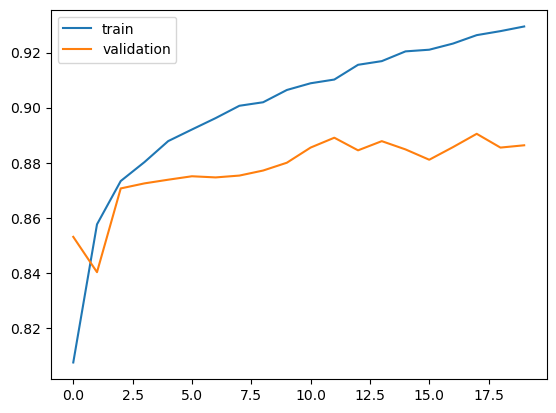

In [50]:
show_history(history)

In [51]:
pred_prob = model.predict(np.expand_dims(test_images[8500], axis=0))
print(pred_prob)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[5.2688520e-05 5.7412421e-09 9.9857950e-01 1.4623052e-07 1.1653596e-03
  2.9912894e-15 2.0235401e-04 5.8566095e-17 1.8747521e-08 2.8961856e-14]]


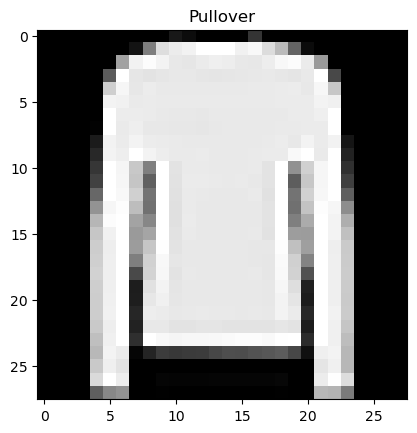

In [52]:
import matplotlib.pyplot as plt

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# print(class_names[pred_prob.flatten().argsort()[::-1][0]])

plt.imshow(test_images[8500], cmap='gray')
plt.title(class_names[pred_prob.flatten().argsort()[::-1][0]])
plt.show()